### Read In Data

In [1]:
# Read in the data from the data folder
# Read in our data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic_test.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Check the number of rows and columns in the data
titanic.shape

(418, 11)

In [3]:
# Check the type of data stored in each column
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Feature creation

In [4]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
tit_Title = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = tit_Title.apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_ind,Family_cnt
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,2


# Fill Missing For `Age` and 'Embarked'

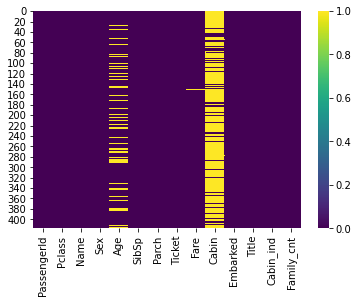

In [5]:
sns.heatmap(titanic.isnull(),cmap='viridis')

In [6]:
# Fill in missing values for the Age feature
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Cabin_ind        0
Family_cnt       0
dtype: int64

In [7]:
# Fill in missing values for the Fare feature
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace =True)
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Cabin_ind        0
Family_cnt       0
dtype: int64

# Remove Outliers and unnecessary features

In [8]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,Family_cnt
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.217703,0.839713
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500,0.413179,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,10.000000


In [9]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [10]:
# Determine what the upperbound should be for continuous features
for feat in ['Age', 'Family_cnt', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age:
  --95p: 55.0 / 19 values exceed that
  --3sd: 68.1 / 1 values exceed that
  --99p: 63.8 / 5 values exceed that

Outlier caps for Family_cnt:
  --95p: 3.0 / 20 values exceed that
  --3sd: 5.4 / 10 values exceed that
  --99p: 7.0 / 4 values exceed that

Outlier caps for Fare:
  --95p: 151.6 / 20 values exceed that
  --3sd: 202.9 / 18 values exceed that
  --99p: 262.4 / 3 values exceed that


In [11]:
# Cap features
titanic['Age'].clip(upper=titanic['Age'].quantile(.99), inplace=True)
titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99), inplace=True)
titanic['Family_cnt'].clip(upper=titanic['Family_cnt'].quantile(.99), inplace=True)

In [12]:
# Describe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,Family_cnt
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.234672,0.447368,0.392344,35.026222,0.217703,0.811005
std,120.810458,0.841838,12.517968,0.896760,0.981429,51.911299,0.413179,1.365970
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,0.000000,1.000000
max,1309.000000,3.000000,63.830000,8.000000,9.000000,262.375000,1.000000,7.000000


In [13]:
titanic.drop(['SibSp','Parch','Name','Embarked','Ticket','Cabin'],1,inplace=True)

In [14]:
titanic.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,Cabin_ind,Family_cnt
0,892,3,male,34.5,7.8292,Mr,0,0
1,893,3,female,47.0,7.0000,Mrs,0,1
2,894,2,male,62.0,9.6875,Mr,0,0
3,895,3,male,27.0,8.6625,Mr,0,0
4,896,3,female,22.0,12.2875,Mrs,0,2


In [15]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Title          0
Cabin_ind      0
Family_cnt     0
dtype: int64

# Transform Skewed Features

In [16]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


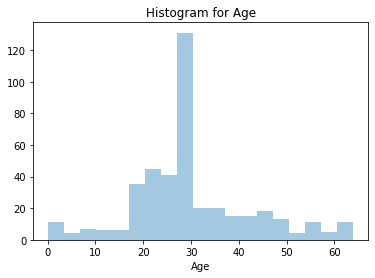

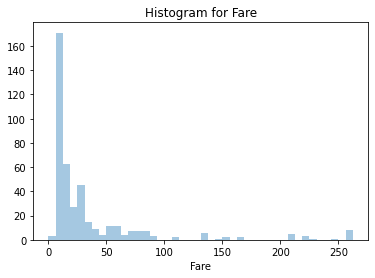

In [17]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['Age', 'Fare']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

# it is not required for age

In [18]:
# Create the new transformed feature
titanic['Fare'] = titanic['Fare'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,Cabin_ind,Family_cnt
0,892,3,male,34.5,1.509188,Mr,0,0
1,893,3,female,47.0,1.475773,Mrs,0,1
2,894,2,male,62.0,1.574861,Mr,0,0
3,895,3,male,27.0,1.540028,Mr,0,0
4,896,3,female,22.0,1.651554,Mrs,0,2


#Convert Categorical Features To Numeric

In [19]:
# Convert categorical features to numeric levels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'].astype(str))


dummies_creation


In [20]:
Pclass = pd.get_dummies(titanic['Pclass'],drop_first = True)
Title = pd.get_dummies(titanic['Title'],drop_first = True)
titanic.drop(['Pclass','Title'],axis=1,inplace =True)
titanic.head()

,PassengerId,Sex,Age,Fare,Cabin_ind,Family_cnt
0,892,1,34.5,1.509188,0,0
1,893,0,47.0,1.475773,0,1
2,894,1,62.0,1.574861,0,0
3,895,1,27.0,1.540028,0,0
4,896,0,22.0,1.651554,0,2


In [21]:
titanic = pd.concat([titanic,Pclass,Title],axis=1)

In [22]:
titanic.head()

,PassengerId,Sex,Age,Fare,Cabin_ind,Family_cnt,2,3,Miss,Mr,Mrs,Other
0,892,1,34.5,1.509188,0,0,0,1,0,1,0,0
1,893,0,47.0,1.475773,0,1,0,1,0,0,1,0
2,894,1,62.0,1.574861,0,0,1,0,0,1,0,0
3,895,1,27.0,1.540028,0,0,0,1,0,1,0,0
4,896,0,22.0,1.651554,0,2,0,1,0,0,1,0


In [23]:
titanic.to_csv('taitanic_cleaned_test.csv',index = False)

In [24]:
titanic.drop(['Miss','Mr','Mrs','Other'],axis =1).to_csv('taitanic_test_cleaned_req.csv',index = False)